In [272]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, PCA, FastICA
import numpy as np
from tqdm import tqdm
import pandas as pd
%matplotlib inline

In [273]:
def remove_ticks(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    
def plot_bases(V):
    t = int(np.sqrt(V.shape[0]))
    fig, axes = plt.subplots(t,t, figsize=(14,14));
    fig.suptitle("bases")
    for i, ax in enumerate(axes.flatten()):
        remove_ticks(ax)
        ax.imshow(V[i].reshape(64,64), cmap="gray");

def plot_faces(X, U, V, n_faces=3):
    n_faces = 3
    t = int(np.sqrt(V.shape[0]))

    selected_faces = np.random.choice(range(400), size=n_faces)

    #plotting weights
    fig, axes = plt.subplots(1,n_faces,figsize=(8,4));
    fig.suptitle("weights")
    for i, ax in enumerate(axes.flatten()):
        n = selected_faces[i] ;
        cax = ax.imshow(U[n].reshape(8,8), cmap="gray");
        remove_ticks(ax);

    fig, axes = plt.subplots(n_faces,2,figsize=(8,12));

    for i, row_axes in enumerate(axes):
        n = selected_faces[i]
        reconst_face = (U[n] @ V)
        remove_ticks(row_axes[0]);
        remove_ticks(row_axes[1]);
        row_axes[0].set_title("original");
        row_axes[1].set_title("reconstructed");
        row_axes[0].imshow(X[n].reshape(64,64),cmap="gray");
        row_axes[1].imshow(reconst_face.reshape(64,64),cmap="gray");

In [274]:
dataset = fetch_olivetti_faces(shuffle=True)
X = dataset.data

In [275]:
#initialize T, V, and <S>_{q(S)}
m = X.shape[0]
n = X.shape[1]
r = 64
T = np.random.exponential(0.1, size=(m,r))
V = np.random.exponential(0.1, size=(r,n))
exp_S = np.random.rand(m, r, n)
print(X.shape)
print((T @ V).shape)

(400, 4096)
(400, 4096)


In [276]:
def e_step(T, V, S, X):
    #HACK
    r = S.shape[1]
    S_sum = T @ V
    for i in range(r):
        S[:, i, :] =  ((T[:, [i]] @ V[[i], :])/S_sum)*X
    return S

def m_step(T, V, S):
    #TODO: What if r = n or r = m
    T_new = S.sum(2) / V.sum(1)
    V_new = S.sum(0) / T.sum(0)[:, np.newaxis]
    return T_new, V_new

def calc_frob(L, X):
    return np.linalg.norm(L-X, ord="fro")

In [277]:
no_epochs = 500

In [278]:
errors = []
for epoch in tqdm(range(no_epochs)):
    exp_S = e_step(T, V, exp_S, X)
    T, V = m_step(T, V, exp_S)
    errors.append(calc_frob(T@V, X))
errors = pd.Series(errors)



  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<05:51,  1.42it/s]

  0%|          | 2/500 [00:01<05:53,  1.41it/s]

  1%|          | 3/500 [00:02<05:49,  1.42it/s]

  1%|          | 4/500 [00:02<05:56,  1.39it/s]

  1%|          | 5/500 [00:03<06:01,  1.37it/s]

  1%|          | 6/500 [00:04<06:22,  1.29it/s]

  1%|▏         | 7/500 [00:05<06:20,  1.30it/s]

  2%|▏         | 8/500 [00:06<06:17,  1.30it/s]

  2%|▏         | 9/500 [00:06<06:14,  1.31it/s]

  2%|▏         | 10/500 [00:07<06:13,  1.31it/s]

  2%|▏         | 11/500 [00:08<06:17,  1.30it/s]

  2%|▏         | 12/500 [00:09<06:25,  1.27it/s]

  3%|▎         | 13/500 [00:10<06:27,  1.26it/s]

  3%|▎         | 14/500 [00:11<06:24,  1.26it/s]

  3%|▎         | 15/500 [00:11<06:25,  1.26it/s]

  3%|▎         | 16/500 [00:12<06:26,  1.25it/s]

  3%|▎         | 17/500 [00:13<06:26,  1.25it/s]

  4%|▎         | 18/500 [00:14<06:30,  1.23it/s]

  4%|▍         | 19/500 [00:15<06:31,  1.23it/s]

  4%|▍         |

 29%|██▉       | 145/500 [01:58<04:49,  1.23it/s]

 29%|██▉       | 146/500 [01:58<04:48,  1.23it/s]

 29%|██▉       | 147/500 [01:59<04:46,  1.23it/s]

 30%|██▉       | 148/500 [02:00<04:45,  1.23it/s]

 30%|██▉       | 149/500 [02:00<04:44,  1.23it/s]

 30%|███       | 150/500 [02:01<04:43,  1.23it/s]

 30%|███       | 151/500 [02:02<04:42,  1.23it/s]

 30%|███       | 152/500 [02:03<04:41,  1.24it/s]

 31%|███       | 153/500 [02:03<04:40,  1.24it/s]

 31%|███       | 154/500 [02:04<04:39,  1.24it/s]

 31%|███       | 155/500 [02:05<04:38,  1.24it/s]

 31%|███       | 156/500 [02:05<04:37,  1.24it/s]

 31%|███▏      | 157/500 [02:06<04:36,  1.24it/s]

 32%|███▏      | 158/500 [02:07<04:35,  1.24it/s]

 32%|███▏      | 159/500 [02:07<04:33,  1.24it/s]

 32%|███▏      | 160/500 [02:08<04:32,  1.25it/s]

 32%|███▏      | 161/500 [02:09<04:31,  1.25it/s]

 32%|███▏      | 162/500 [02:09<04:30,  1.25it/s]

 33%|███▎      | 163/500 [02:10<04:29,  1.25it/s]

 33%|███▎      | 164/500 [02:11

 58%|█████▊    | 288/500 [04:02<02:58,  1.19it/s]

 58%|█████▊    | 289/500 [04:03<02:58,  1.19it/s]

 58%|█████▊    | 290/500 [04:04<02:57,  1.18it/s]

 58%|█████▊    | 291/500 [04:06<02:56,  1.18it/s]

 58%|█████▊    | 292/500 [04:07<02:56,  1.18it/s]

 59%|█████▊    | 293/500 [04:08<02:55,  1.18it/s]

 59%|█████▉    | 294/500 [04:09<02:54,  1.18it/s]

 59%|█████▉    | 295/500 [04:10<02:54,  1.18it/s]

 59%|█████▉    | 296/500 [04:11<02:53,  1.18it/s]

 59%|█████▉    | 297/500 [04:13<02:52,  1.17it/s]

 60%|█████▉    | 298/500 [04:14<02:52,  1.17it/s]

 60%|█████▉    | 299/500 [04:14<02:51,  1.17it/s]

 60%|██████    | 300/500 [04:15<02:50,  1.17it/s]

 60%|██████    | 301/500 [04:16<02:49,  1.17it/s]

 60%|██████    | 302/500 [04:18<02:49,  1.17it/s]

 61%|██████    | 303/500 [04:19<02:48,  1.17it/s]

 61%|██████    | 304/500 [04:20<02:47,  1.17it/s]

 61%|██████    | 305/500 [04:21<02:46,  1.17it/s]

 61%|██████    | 306/500 [04:22<02:46,  1.17it/s]

 61%|██████▏   | 307/500 [04:23

 86%|████████▌ | 431/500 [06:31<01:02,  1.10it/s]

 86%|████████▋ | 432/500 [06:32<01:01,  1.10it/s]

 87%|████████▋ | 433/500 [06:33<01:00,  1.10it/s]

 87%|████████▋ | 434/500 [06:34<00:59,  1.10it/s]

 87%|████████▋ | 435/500 [06:35<00:59,  1.10it/s]

 87%|████████▋ | 436/500 [06:36<00:58,  1.10it/s]

 87%|████████▋ | 437/500 [06:37<00:57,  1.10it/s]

 88%|████████▊ | 438/500 [06:38<00:56,  1.10it/s]

 88%|████████▊ | 439/500 [06:39<00:55,  1.10it/s]

 88%|████████▊ | 440/500 [06:40<00:54,  1.10it/s]

 88%|████████▊ | 441/500 [06:41<00:53,  1.10it/s]

 88%|████████▊ | 442/500 [06:42<00:52,  1.10it/s]

 89%|████████▊ | 443/500 [06:43<00:51,  1.10it/s]

 89%|████████▉ | 444/500 [06:44<00:51,  1.10it/s]

 89%|████████▉ | 445/500 [06:45<00:50,  1.10it/s]

 89%|████████▉ | 446/500 [06:46<00:49,  1.10it/s]

 89%|████████▉ | 447/500 [06:47<00:48,  1.10it/s]

 90%|████████▉ | 448/500 [06:48<00:47,  1.10it/s]

 90%|████████▉ | 449/500 [06:49<00:46,  1.10it/s]

 90%|█████████ | 450/500 [06:50

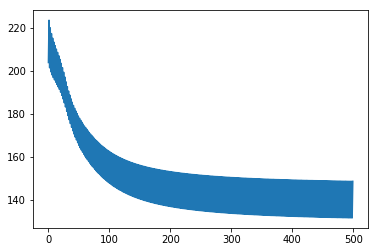

In [279]:
errors.plot()

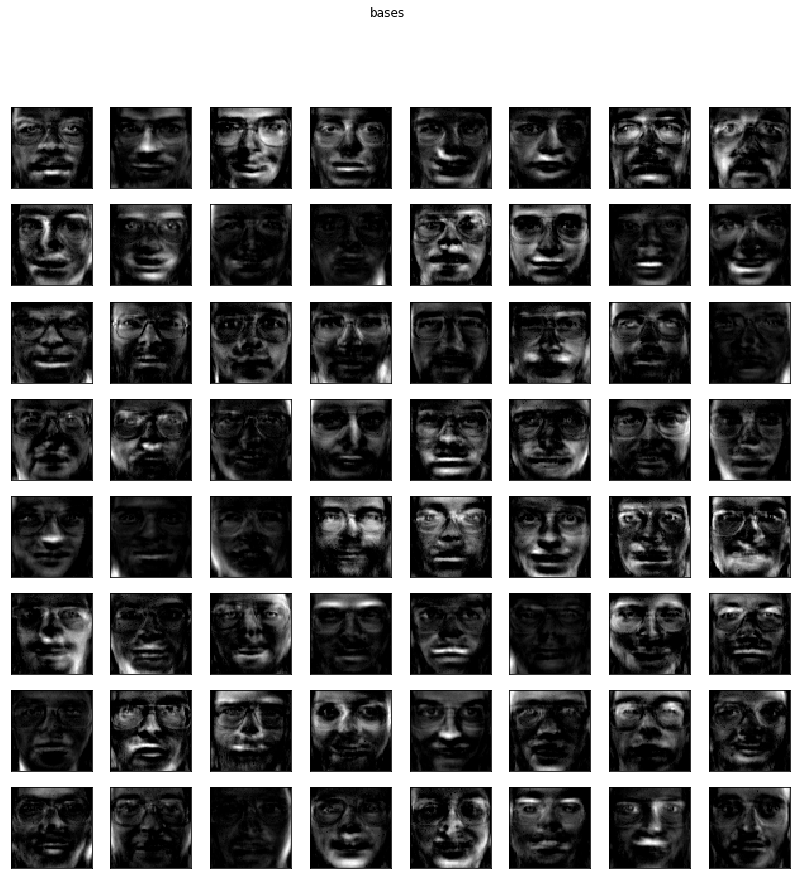

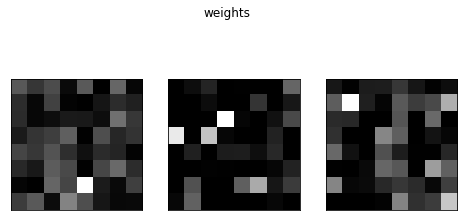

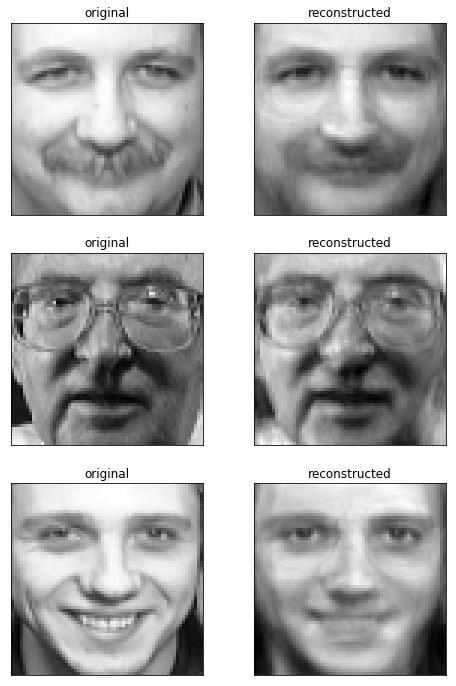

In [280]:
plot_bases(V)
plot_faces(X, T, V, n_faces=3)